In [2]:

# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)


Prophet 0.7.1


In [5]:
# load the car sales dataset
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


In [36]:
df.shape

(108, 2)

In [46]:
a=df.iloc[:,1]

In [47]:
a= DataFrame(a)

In [48]:
a

,y
0,6550
1,8728
2,12026
3,14395
4,14587
...,...
103,16722
104,14385
105,21342
106,17180


In [17]:
df.head(15)

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
5,1960-06-01,13791
6,1960-07-01,9498
7,1960-08-01,8251
8,1960-09-01,7049
9,1960-10-01,9545


In [54]:
df.tail(13)

,ds,y
95,1967-12-01,13713
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099
101,1968-06-01,21084
102,1968-07-01,18024
103,1968-08-01,16722
104,1968-09-01,14385


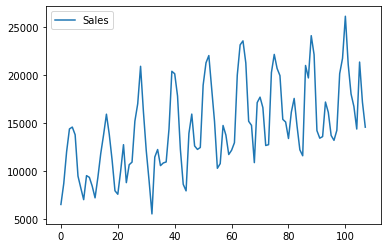

In [8]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [10]:
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [14]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])

from pandas import DataFrame    
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [23]:
future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


In [24]:
df.tail(10)

,ds,y
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099
101,1968-06-01,21084
102,1968-07-01,18024
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [26]:
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12734.789355  15894.062608
1 1968-02-01  14905.955964  13367.265141  16449.105983
2 1968-03-01  20842.150502  19268.067462  22499.945258
3 1968-04-01  22870.095215  21369.922394  24325.420625
4 1968-05-01  24176.211162  22547.393689  25757.244861


/home/walid/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/walid/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


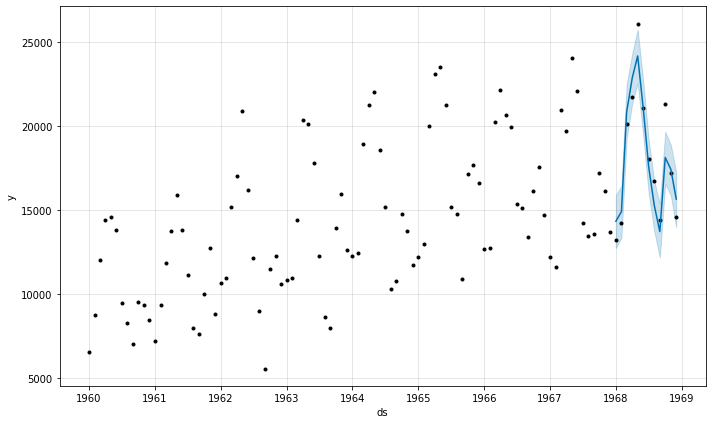

In [27]:
model.plot(forecast)
pyplot.show()

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17795.101137,12734.789355,15894.062608,17795.101137,17795.101137,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,0.0,0.0,0.0,14334.737769
1,1968-02-01,17850.076787,13367.265141,16449.105983,17850.076787,17850.076787,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,0.0,0.0,0.0,14905.955964
2,1968-03-01,17901.505622,19268.067462,22499.945258,17901.505622,17901.505622,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,0.0,0.0,0.0,20842.150502
3,1968-04-01,17956.481273,21369.922394,24325.420625,17956.481273,17956.481273,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,0.0,0.0,0.0,22870.095215
4,1968-05-01,18009.683516,22547.393689,25757.244861,18009.683516,18009.683516,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,0.0,0.0,0.0,24176.211162
5,1968-06-01,18064.659167,19416.987379,22669.369909,18064.659167,18064.659167,2993.020023,2993.020023,2993.020023,2993.020023,2993.020023,2993.020023,0.0,0.0,0.0,21057.679190
6,1968-07-01,18117.861409,15998.699642,19196.865884,18117.861409,18117.861409,-532.371981,-532.371981,-532.371981,-532.371981,-532.371981,-532.371981,0.0,0.0,0.0,17585.489428
7,1968-08-01,18172.837060,13735.113349,16745.430597,18172.837060,18172.837060,-2883.575173,-2883.575173,-2883.575173,-2883.575173,-2883.575173,-2883.575173,0.0,0.0,0.0,15289.261887
8,1968-09-01,18227.812711,12166.421865,15351.838061,18227.812711,18227.812711,-4506.374429,-4506.374429,-4506.374429,-4506.374429,-4506.374429,-4506.374429,0.0,0.0,0.0,13721.438281
9,1968-10-01,18281.014954,16579.590664,19668.457155,18281.014954,18281.014954,-147.104077,-147.104077,-147.104077,-147.104077,-147.104077,-147.104077,0.0,0.0,0.0,18133.910877


In [50]:
train = df.drop(df.index[-12:])
print(train.tail(10))


           ds      y
86 1967-03-01  20985
87 1967-04-01  19692
88 1967-05-01  24081
89 1967-06-01  22114
90 1967-07-01  14220
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [55]:
model = Prophet()

model.fit(train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])


In [58]:
future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


MAE: 1336.814


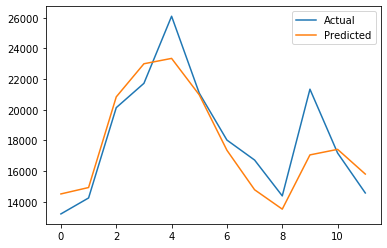

In [61]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)

y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()